## Exercise sheet
### Perceptron -  supervised learning - binary classifier
Perceptron is the easiest neural network algorithm. The aim of algorithm is to create hyperplane in order to separate two groups.

Assumption:
- data should be linearly separable

We look for hyperplane $H=\{x: w_1^Tx+b=0\}$.

We have:
* labels $y=\{-1,1\}$
* data $x^T=[x ,1]$

Let's $w^T=[w_1, b]$, then we were looking for solution of $w^Tx=0$.

Steps:
1. vector $v=0$
2. hits = 0 - it counts well-labeled points
3. For $(x,y)\in D$

    if $yw^Tx \leq 0$ then
    
    $w=w+yx$
    
    else
        hits+=1
4. break if hits = = len(x) (When all points will be correctly classified)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

## Data transformation

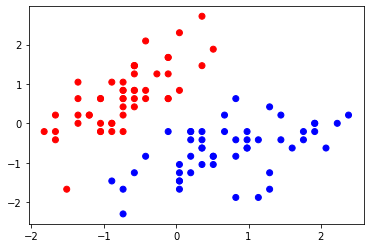

In [2]:
iris = datasets.load_iris()
#Choosing two groups from dataset iris
t= (iris.target[iris.target!=2])
t[t==0]=-1
X = iris.data[:(len(t)), :2] 
# standardization
d = pd.DataFrame(X)
mu=d.mean()
sigma=d.std()
x=(d-mu)/sigma
x[2]=np.ones((len(t),1))
x[3]=list(t)
colors ={-1: 'red',1:'blue'}
plt.scatter(x[0],x[1], c=x[3].map(colors))

## Implementation - perceptron from scratch

Succeeded!


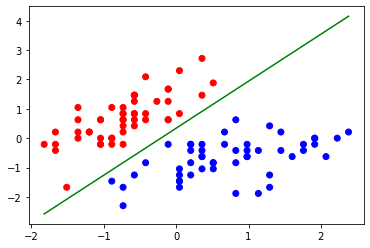

In [9]:
#Step one

#weights
w=[0,0,1] # why code doesn't fully separate groups when w=[0,0,0]?
# learning rate - [0,1]
learning_rate=1
# maximum number allowed of iteration
max_iteration=100

# step two
for k in range(1,max_iteration):
    hits=0    
    
    for i in range(0,len(x)):
        sum=0

        #inner product w*x
        for j in range(0,len(w)):
            sum+=x[j][i]*w[j]
            
        output=sum*x[3][i] 
       
        if output <= 0:
            for j in range(0,len(w)):
                w[j]=w[j] + (learning_rate*x[3][i]*x[j][i])
        else:
            hits+=1
        
            
    if hits == len(x):
        print("Succeeded!")
        break;
       
        
#w[0]x+w[1]y+w[2]=0 => y=(-w[0]/w[1])*x - w[2]/w[1]
if w[1]!=0:
    a=-w[0]/w[1]
    b=-w[2]/w[1]
    x1=np.linspace(min(x[0]),max(x[0]),2)
    x2=a*x1+b
else:
    x1=-w[2]/w[0]
    x2=np.linspace(min(x[0]),max(x[0]),2)
#plotting final results
plt.scatter(x[0],x[1], c=x[3].map(colors))
plt.plot(x1,x2,color='g',linestyle='-')
plt.show()

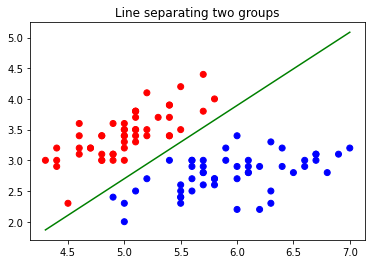

In [71]:
# line transformation in order to fit to the original data 
x_1=np.linspace(min(d[0]),max(d[0]),2)
x_2=(a*x1+b)*sigma[1]+mu[1]
    
plt.scatter(d[0],d[1], c=x[3].map(colors))
plt.plot(x_1,x_2,color='g',linestyle='-')
plt.title("Line separating two groups")
plt.show()

#  Remark
Since I still have been learning and I want to improve my coding and machine learning skills I would be grateful for any feedback and advice.

18.06.2022